In [55]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
tf.__version__


'2.16.2'

In [56]:
keras.__version__

'3.9.0'

In [57]:
fashionMnist=keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)=fashionMnist.load_data()

When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one
important difference is that every image is represented as a 28×28 array rather than a
1D array of size 784. Moreover, the pixel intensities are represented as integers (from
0 to 255) rather than floats (from 0.0 to 255.0). Here is the shape and data type of the
training set:

In [58]:
X_train_full.shape

(60000, 28, 28)

In [59]:
X_train_full.dtype

dtype('uint8')

The xTrainFull[:5000] selects the first 5000 samples as the validation set while the other one selects all the samples after the first 5000 as the training set.<br>
We are performing feature normalisation by bringing the values of the pixel from range 0-255 to 0-1<br>
This is done to : 
- Brings Features to a Common Scale
- Prevents Large Values from Dominating
    - If one feature has much larger values than others, it can dominate the learning process, making the model biased toward that feature.
- Improves Gradient Descent Convergence : As without normalisation gradients can become too large or too small which can lead to :
  - slow convergenec
  - stuck in local minima
  - exploding or vanishing gradients


In [60]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [61]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Creating the model using sequential API <br>
Sequential API : 
- An API (Application Programming Interface) is a set of predefined methods or functions that allow developers to interact with software or hardware without knowing its internal implementation.
- The Keras Sequential API is a high-level deep learning API that simplifies building models by letting the user add layers in a linear order.

In [62]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu", name="hidden_1"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/Users/niteshchoubey/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Explanation of the code :
- Sequential implies that the layers are added in linear order i.e one after other
- Then we are adding different layers to the model <br>
## Layers : 
- Input layer : Takes in the input data no computation occurs at this layer
- Dense layer : Each neuron in a layer is connected to all the neurons in the previous layer.
- Flatten layer : Converts multi dimentsional input into 1D vector.
- Convolutional layer : Extracts patterns from images.
- Pooling layer : Reduces feature map size while preserving size.
- Batch Normalization layer : Normalizes activation thus improving stability and speeding up training.
## Layer utilisation :
- The Flatten layer converts the 28×28 pixel image into a 1D array of 784 values (28 × 28 = 784).
- Dense(300): A fully connected layer with 300 neurons.
    - ReLU activation ("relu"): Applies the function ReLU(x) = max(0, x), which:
    - Introduces non-linearity (helps the network learn complex patterns).
    - Prevents the vanishing gradient problem (compared to sigmoid/tanh).
- Dense(100): Another fully connected layer with 100 neurons.
- Dense(10): The final layer has 10 neurons, one for each possible class (image class 0-9).
    - Softmax activation:
    - Converts raw outputs (logits) into probabilities.
    - Ensures that all probabilities sum to 1.
    - The highest probability determines the predicted class.
## Activations :
Activation functions introduces non linearity in the neural networks allowing them to learn more complex patterns as<br>
output = activation function(wx+b)<br>
### Important Activation Functions :
- ReLU(Rectified Linear Unit) : $f(x) = \max(0, x)$
- Sigmoid(Logistic Activation) : $f(x) = \frac{1}{1 + e^{-x}}$ : binary classification
- Softmax : $f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$ : multi class classification

In [63]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Note that Dense layers often have a lot of parameters. For example, the first hidden
layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to
235,500 parameters! This gives the model quite a lot of flexibility to fit the training
data, but it also means that the model runs the risk of overfitting, especially when you
do not have a lot of training data.

In [64]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=hidden_1, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [65]:
model.layers[1].name

'hidden_1'

In [ ]:
# model.get_layer('dense_4').name

'dense_4'

In [67]:
hidden1=model.get_layer('hidden_1')
weights, biases = hidden1.get_weights()
weights

array([[ 0.02285384,  0.00079155, -0.03178584, ...,  0.02413572,
        -0.0459605 , -0.02384993],
       [-0.00336529, -0.0342773 , -0.05909605, ..., -0.02955465,
        -0.05116399, -0.04711928],
       [-0.00245371,  0.05775681, -0.06565411, ..., -0.00968584,
         0.07102074,  0.06912084],
       ...,
       [-0.04019788,  0.02710389,  0.00519621, ...,  0.03528852,
        -0.02027701, -0.01810737],
       [ 0.02308491,  0.07033858, -0.06883096, ...,  0.04964148,
         0.06672479, -0.00511347],
       [ 0.06956749,  0.05890226, -0.00685666, ..., -0.05285882,
        -0.05746996, -0.05273993]], dtype=float32)

In [68]:
weights.shape

(784, 300)

In [69]:
biases.shape

(300,)

In [70]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
optimizer=keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

## Loss Function
Determines how close is the prediction to the actual value, optimizers tweek the values of parameters to minimise this loss <br>
Both sparse_categorical_crossentropy and categorical_crossentropy compute the loss using the negative log-likelihood of the correct class probability, but they differ in how they handle labels.<br>
### 1. Sparse Categorical Crossentropy (Integer Labels)
The loss is computed as:

$$
L = -\log(p_{y})
$$
where:
- $ p_{y} $ is the predicted probability of the true class \( y \).
- $ y $ is the true class label (an integer).

### 2. Categorical Crossentropy (One-Hot Labels)
The loss is computed as:

$$
L = -\sum_{i} y_i \log(p_i)
$$

where:
-  $ y_i $ is the one-hot encoded true label (only one value is 1, others are 0).
-  $ p_i $ is the predicted probability for class \( i \).

The sparse categorical cross entropy is used for multi class classification directly determines the integer value of the class, whereas categorical cross entropy uses one hot encoded labels i.e vectors specifing the the class value in binary form e.g. [0.,
0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3.

## Model compilation : 
- $ p_{y} $ is just the softmax probability of the correct class (i.e., the probability assigned to the true label y).<br>
Loss measures how confident the model was about the correct class. i.e if model is confident eg $ p_y $ = 0.99 then loss function L is small else if $p_y$ = 0.2 that would give large L.<br>
- Minimizing L forces the model to increase $p_y$(i.e., make better predictions).
- The optimizer adjusts weights to improve classification over multiple training iterations.

## Optimizer: sgd (Stochastic Gradient Descent)
- SGD (Stochastic Gradient Descent) adjusts weights using small random batches rather than using the entire dataset thus making the model simple and efficient.
- It gradually reduces loss by adjusting weights based on the gradient of the loss function.

## Metric : accuracy
- It measures how often does the predicted class matches the true label.


In [78]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8399 - loss: 0.4716 - val_accuracy: 0.8420 - val_loss: 0.4546
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8446 - loss: 0.4491 - val_accuracy: 0.8454 - val_loss: 0.4604
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8449 - loss: 0.4414 - val_accuracy: 0.8580 - val_loss: 0.4249
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8500 - loss: 0.4300 - val_accuracy: 0.8504 - val_loss: 0.4408
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8510 - loss: 0.4275 - val_accuracy: 0.8404 - val_loss: 0.4441
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8516 - loss: 0.4277 - val_accuracy: 0.8482 - val_loss: 0.4585
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8503 - loss: 0.4280 - val_accuracy: 0.8588 - val_loss: 0.4188
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8494 - loss: 0.42

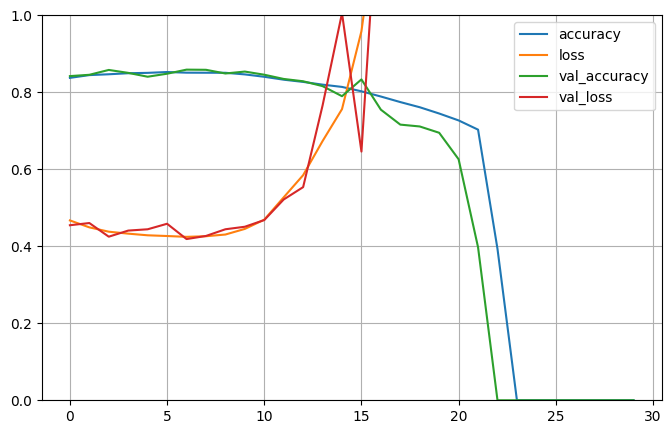

In [80]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [81]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0000e+00 - loss: nan


[nan, 0.0]

In [82]:
X_new = X_test[:3]
y_prob=model.predict(X_new)
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32)

In [83]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)
np.array(class_names)[y_pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0 0 0]


array(['T-shirt/top', 'T-shirt/top', 'T-shirt/top'], dtype='<U11')

In [54]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8350 - loss: 0.4794 - val_accuracy: 0.8422 - val_loss: 0.4710
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8344 - loss: 0.4780 - val_accuracy: 0.8414 - val_loss: 0.4680
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8349 - loss: 0.4776 - val_accuracy: 0.8418 - val_loss: 0.4652
Epoch 4/30
 455/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8379 - loss: 0.4695

KeyboardInterrupt: 